# Gradient and Jacobian Visualizer

This notebook introduces key multivariate calculus tools used in machine learning and optimization. These concepts form the basis for optimization algorithms and backpropagation in deep learning:
- Gradients of scalar-valued functions
- Jacobians of vector-valued functions
- Visual intuition through plots and vector fields

## Setup

In [14]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)

## Gradients

For $f : \mathbb{R}^n \rightarrow \mathbb{R}$, the gradient is:

$$
\nabla f(x) = \begin{bmatrix}  
\frac{\partial f}{\partial x_1} \\
\vdots \\
\frac{\partial f}{\partial x_n}
\end{bmatrix}
$$

It points in the direction of the steepest ascent.

### Quadratic Bowl Example

Let's start with the function:

$$f(x, y) = x^2 + y^2$$

The gradient is the following:

$$
\nabla f(x, y) = 
\begin{bmatrix} 
\frac{\partial f}{\partial x} \\[6pt]
\frac{\partial f}{\partial y} 
\end{bmatrix} = 
\begin{bmatrix} 2x \\ 2y \end{bmatrix}
$$

Let's visualize the gradient using a grid of points within $[-2, 2] \times [-2, 2]$, plot the contour lines of $f(x, y)$, and overlay the gradient vectors.

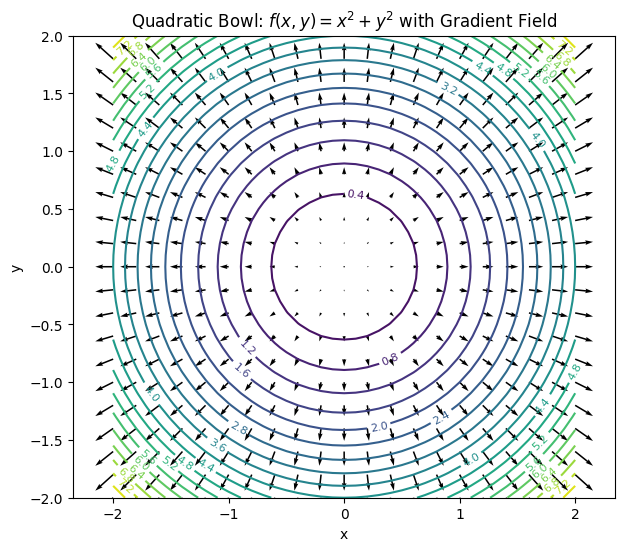

In [27]:
def f(x, y):
    return x**2 + y**2

def grad_f(x, y):
    return np.array([2 * x, 2 * y])

x = np.linspace(-2, 2, 41)
y = np.linspace(-2, 2, 41)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

Gx, Gy = grad_f(X, Y)

# Plot contours
plt.figure(figsize=(7, 6))
CS = plt.contour(X, Y, Z, levels=20)
plt.clabel(CS, inline=True, fontsize=8)

# Plot gradient vectors
plt.quiver(X[::2, ::2], Y[::2, ::2], Gx[::2, ::2], Gy[::2, ::2], angles="xy")

plt.title("Quadratic Bowl: $f(x, y) = x^2 + y^2$ with Gradient Field")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.show()

### Nonlinear Example

Now let's consider:

$$f(x, y) = sin(xy)$$

The gradient is the following:

$$\nabla f(x, y) = 
\begin{bmatrix} 
\frac{\partial f}{\partial x} \\[6pt]
\frac{\partial f}{\partial y} 
\end{bmatrix} = 
\begin{bmatrix}
y \cdot cos(xy) \\
x \cdot cos(xy)
\end{bmatrix}
$$

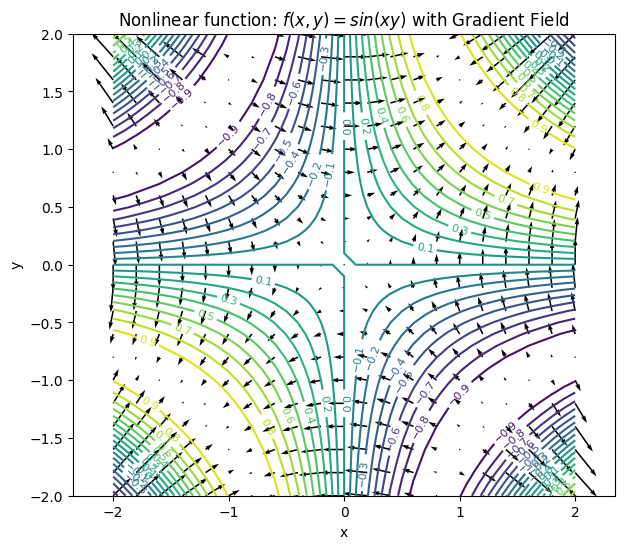

In [26]:
def f(x, y):
    return np.sin(x * y)

def grad_f(x, y):
    return np.array([y * np.cos(x * y), x * np.cos(x * y)])

x = np.linspace(-2, 2, 41)
y = np.linspace(-2, 2, 41)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

Gx, Gy = grad_f(X, Y)

# Plot contours
plt.figure(figsize=(7, 6))
CS = plt.contour(X, Y, Z, levels=20)
plt.clabel(CS, inline=True, fontsize=8)

# Plot gradient vectors
plt.quiver(X[::2, ::2], Y[::2, ::2], Gx[::2, ::2], Gy[::2, ::2], angles="xy")

plt.title("Nonlinear function: $f(x, y) = sin(xy)$ with Gradient Field")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.show()

### Numerical Gradient Check

We can approximate each partial derivative using finite differences. Meaning that for a small step $h$, e.g. $10^{-5}$, we estimate:

$$
\frac{\partial f}{\partial x}(x, y) \approx \frac{f(x + h, y) - f(x - h, y)}{2h}
$$

$$
\frac{\partial f}{\partial y}(x, y) \approx \frac{f(x, y + h) - f(x, y - h)}{2h}
$$

In [25]:
def numerical_grad(f, x, y, h=1e-5):
    df_dx = (f(x + h, y) - f(x - h, y)) / (2 * h)
    df_dy = (f(x, y + h) - f(x, y - h)) / (2 * h)
    return np.array([df_dx, df_dy])

f = lambda x, y: x**2 + y**2
grad_f = lambda x, y: np.array([2 * x, 2 * y])
print("Quad Bowl")
for x, y in [(0, 0), (1, 2), (-1, -1), (0.5, -1.5)]:
    print(f"({x}, {y}) analytical:", grad_f(x, y))
    print(f"({x}, {y}) numerical:", numerical_grad(f, x, y))

print("\n==\n")

f = lambda x, y: np.sin(x * y)
grad_f = lambda x, y: np.array([y * np.cos(x * y), x * np.cos(x * y)])
print("Nonlinear")
for x, y in [(0, 0), (1, 2), (-1, -1), (0.5, -1.5)]:
    print(f"({x}, {y}) analytical:", grad_f(x, y))
    print(f"({x}, {y}) numerical:", numerical_grad(f, x, y))

Quad Bowl
(0, 0) analytical: [0 0]
(0, 0) numerical: [0. 0.]
(1, 2) analytical: [2 4]
(1, 2) numerical: [2. 4.]
(-1, -1) analytical: [-2 -2]
(-1, -1) numerical: [-2. -2.]
(0.5, -1.5) analytical: [ 1. -3.]
(0.5, -1.5) numerical: [ 1. -3.]

==

Nonlinear
(0, 0) analytical: [0. 0.]
(0, 0) numerical: [0. 0.]
(1, 2) analytical: [-0.832 -0.416]
(1, 2) numerical: [-0.832 -0.416]
(-1, -1) analytical: [-0.54 -0.54]
(-1, -1) numerical: [-0.54 -0.54]
(0.5, -1.5) analytical: [-1.098  0.366]
(0.5, -1.5) numerical: [-1.098  0.366]


## Jacobians

The Jacobian is the generalization of a derivative when the function's output is a vector. 

- If $f : \mathbb{R}^n \rightarrow \mathbb{R}$, the derivative is a gradient vector
- If $f : \mathbb{R}^n \rightarrow \mathbb{R}^m$, the derivative is a Jacobian matrix
- The derivative of $f(x, y) = x^2 + y^2$ is a gradient vector
- The derivative of $f(x, y) = [x^2, xy, e^y]^T$ is a Jacobian matrix

When a function has multiple outputs, each output can change differently with respect to each input. The Jacobian is the matrix that organizes the partial derivatives. For a function $f : \mathbb{R}^n \rightarrow \mathbb{R}^m$, the Jacobian of $f$ is:

$$
J_f(x) = 
\begin{bmatrix}
\frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} & \cdots & \frac{\partial f_1}{\partial x_n} \\[6pt]
\frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2} & \cdots & \frac{\partial f_2}{\partial x_n} \\[6pt]
\vdots & \vdots & \ddots & \vdots \\[6pt]
\frac{\partial f_m}{\partial x_1} & \frac{\partial f_m}{\partial x_2} & \cdots & \frac{\partial f_m}{\partial x_n}
\end{bmatrix} =
\begin{bmatrix}
\nabla f_1(x)^T \\
\nabla f_2(x)^T \\
\vdots \\
\nabla f_m(x)^T
\end{bmatrix}
$$

Each row of the Jacobian is the gradient of one output component $f_i$.

### Nonlinear Example

Let's consider the nonlinear function:

$$
f(x, y) =
\begin{bmatrix}
x^2 \\
xy \\
e^y
\end{bmatrix}
$$

The Jacobian is the following:

$$
J_f(x, y) =
\begin{bmatrix}
2x & 0 \\
y & x \\
0 & e^y
\end{bmatrix}
$$

In [ ]:
def f(x, y):
    return np.array([x**2, x * y, np.exp(y)])

def J_f(x, y):
    return np.array([[2 * x, 0], [y, x], [0, np.exp(y)]])

for x, y in [(0, 0), (1, 1), (2, -1)]:
    print(f"f({x}, {y}):", f(x, y))
    print(f"J_f({x}, {y}):")
    print(J_f(x, y))
    print()

f(0, 0): [0. 0. 1.]
J_f(0, 0):
[[0. 0.]
 [0. 0.]
 [0. 1.]]

f(1, 1): [1.    1.    2.718]
J_f(1, 1):
[[2.    0.   ]
 [1.    1.   ]
 [0.    2.718]]

f(2, -1): [ 4.    -2.     0.368]
J_f(2, -1):
[[ 4.     0.   ]
 [-1.     2.   ]
 [ 0.     0.368]]



### Linear Example

Let's consider the following linear function:

$$
f(x, y) = A \begin{bmatrix} x \\ y \end{bmatrix}, A = \begin{bmatrix} 2 & -1 \\ 1 & 3 \end{bmatrix}
$$

The Jacobian is simply $A$ because the same transformation is applied for every $x, y$.

### Visualization of Local Linear Approximation

For the nonlinear $f(x, y)$, the Jacobian gives the best linear approximation near a base point $(x_0, y_0)$:

$$
f(x, y) \approx f(x_0, y_0) + J_f(x_0, y_0) \begin{bmatrix} x - x_0 \\ y - y_0 \end{bmatrix}
$$

Let's assume the nonlinear function $f(x, y) = [x^2, xy, e^y]^T$:
- Choose a base point $(1, 1)$, 
- Make small perturbations around it $\Delta x = [\delta_x, \delta_y]^T$
- Evaluate the true function $f(x_0 + \delta_x, y_0 + \delta_y)$
- Get linear approximations using the Jacobian at the base $f(x_0, y_0) + J_f(x_0, y_0)[\delta_x, \delta_y]^T$
- Compare true values vs linear approximations

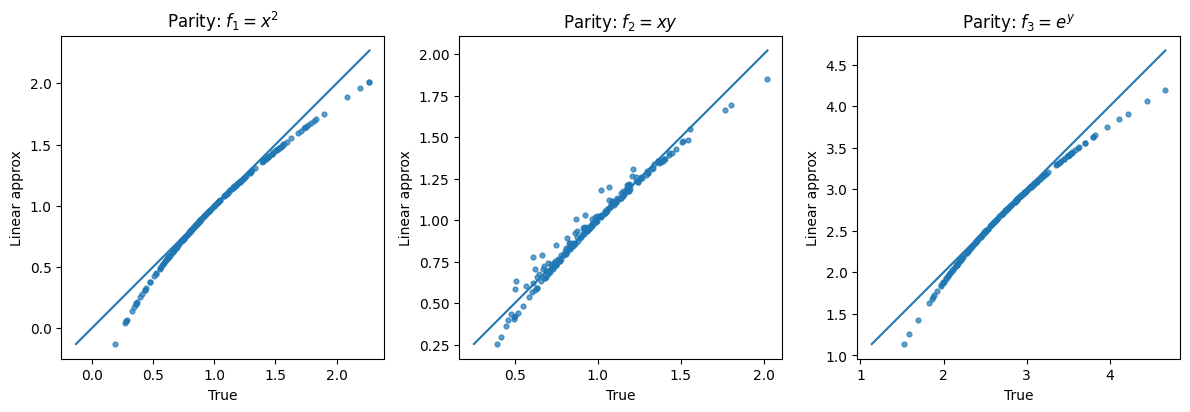

Component f1:
  Mean absolute error = 0.04348235165909793
  Max absolute error  = 0.3202634029876479
  Mean relative error = 0.07484086218212882

Component f2:
  Mean absolute error = 0.027918792108772114
  Max absolute error  = 0.17326786808238626
  Mean relative error = 0.035540533763962066

Component f3:
  Mean absolute error = 0.051801747027254576
  Max absolute error  = 0.4800441510893778
  Mean relative error = 0.019981798851869608



In [64]:
def f(x, y):
    return np.array([x**2, x * y, np.exp(y)])

def J_f(x, y):
    return np.array([[2 * x, 0], [y, x], [0, np.exp(y)]])

x0, y0 = 1, 1
f0 = f(x0, y0)
J0 = J_f(x0, x0)
deltas = np.random.normal(loc=0, scale=0.2, size=(200, 2))

true_vals = np.array([f(x0 + dx, y0 + dy) for dx, dy in deltas])
lin_approx = f0 + (deltas @ J0.T)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for j, ax in enumerate(axes):
    ax.scatter(true_vals[:, j], lin_approx[:, j], s=12, alpha=0.7)
    lo = min(true_vals[:, j].min(), lin_approx[:, j].min())
    hi = max(true_vals[:, j].max(), lin_approx[:, j].max())
    ax.plot([lo, hi], [lo, hi])
    comp_names = ["$f_1=x^2$", "$f_2=xy$", "$f_3=e^y$"]
    ax.set_title(f"Parity: {comp_names[j]}")
    ax.set_xlabel("True")
    ax.set_ylabel("Linear approx")
    ax.set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()

abs_err = np.abs(true_vals - lin_approx)
rel_err = abs_err / (np.abs(true_vals) + 1e-12)
for j, name in enumerate(["f1", "f2", "f3"]):
    mean_abs = abs_err[:, j].mean()
    max_abs = abs_err[:, j].max()
    mean_rel = rel_err[:, j].mean()

    print(f"Component {name}:")
    print(f"  Mean absolute error = {mean_abs}")
    print(f"  Max absolute error  = {max_abs}")
    print(f"  Mean relative error = {mean_rel}")
    print()